# Writing a Data CSV for Internal Lamp Calibrations

All your calibration data and necessary FITS headers will be stored in a CSV written with the `write_fits_info_to_csv` function. Check out `CHARIS/datacsvs` for examples of these.

# Step 1: Verify Apertures
I hardcoded the rectangular aperture objects that I've been using in `constants.py`. This is the default aperture in the csv writer function (which performs aperture photometry). I'm unsure if the orientation of CHARIS frames changes, so it is a good idea to verify that these apertures work. If they don't, you can change the apertures from the defaults on the csv writer.

(<matplotlib.patches.Rectangle at 0x7f2c9e3a0e50>,)

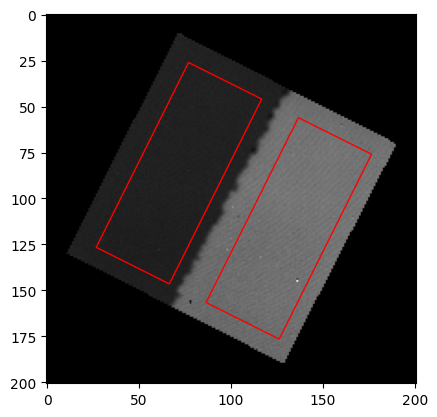

In [12]:
from pyPolCal.constants import charis_aperture_l,charis_aperture_r
import matplotlib.pyplot as plt
from astropy.io import fits

# plotting a fits cube wavelength slice
cubepath = '/home/thomasmc/nbs_in/pol/cubes/CRSA00171750_cube.fits'
cube_image_data = fits.open(cubepath)[1].data # image data stored in the second HDU

# plot a test frame
plt.imshow(cube_image_data[10], cmap='gray') # plotting wavelength bin 10
charis_aperture_l.plot(color='r')
charis_aperture_r.plot(color='r')

# Step 2: Write CSV

You need to have a directory with the cubes you want processed and the corresponding raw files. The raw files are required to extract the HWP and derotator angles, since these are lost in the DEP. The CSV writer takes in the wavelength bin as an argument (I use bin numbers with zero based indexing, so 1160nm = bin 0). Some important arguments: you can put in custom left and right apertures. You can also specify a HWP angle order and if you'd like to delete any angles. Note that for differencing functions later on to work, you must order the HWPs in the order that they are double differenced: [$\theta_{1+},\theta_{1-},\theta_{2+},\theta_{2-},...$]. See the default argument for an example. I delete the 90 degree angle because this is useless in my double differencing.

In [14]:
from pyPolCal.csv_tools import write_fits_info_to_csv

processed_cube_dir = '/home/thomasmc/nbs_in/pol/cubes'
raw_cube_dir = '/home/thomasmc/nbs_in/pol/raw'

for bin in range(22): # 22 wavelength bins
    csv_filepath = f'/home/thomasmc/nbs_in/pol/csvs/bin{bin}.csv'
    write_fits_info_to_csv(processed_cube_dir,raw_cube_dir,csv_filepath,bin)

CSV file written to /home/thomasmc/nbs_in/pol/csvs/bin0.csv
CSV file written to /home/thomasmc/nbs_in/pol/csvs/bin1.csv
CSV file written to /home/thomasmc/nbs_in/pol/csvs/bin2.csv
CSV file written to /home/thomasmc/nbs_in/pol/csvs/bin3.csv
CSV file written to /home/thomasmc/nbs_in/pol/csvs/bin4.csv
CSV file written to /home/thomasmc/nbs_in/pol/csvs/bin5.csv
CSV file written to /home/thomasmc/nbs_in/pol/csvs/bin6.csv
CSV file written to /home/thomasmc/nbs_in/pol/csvs/bin7.csv
CSV file written to /home/thomasmc/nbs_in/pol/csvs/bin8.csv
CSV file written to /home/thomasmc/nbs_in/pol/csvs/bin9.csv
CSV file written to /home/thomasmc/nbs_in/pol/csvs/bin10.csv
CSV file written to /home/thomasmc/nbs_in/pol/csvs/bin11.csv
CSV file written to /home/thomasmc/nbs_in/pol/csvs/bin12.csv
CSV file written to /home/thomasmc/nbs_in/pol/csvs/bin13.csv
CSV file written to /home/thomasmc/nbs_in/pol/csvs/bin14.csv
CSV file written to /home/thomasmc/nbs_in/pol/csvs/bin15.csv
CSV file written to /home/thomasmc

Feel free to compare your csvs with the ones in `CHARIS/datacsvs` to see if everything looks ok. A common bug is that the double differencing cycle doesn't complete at the end of the CSV. This will mess up double differencing later on. 